In [3]:
# Import Packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

data = pd.read_csv('/Users/rachaelreich/Desktop/Starbucks/sbux_nutrition.csv')
data.head()

,drink_name,type,size,calories,fat,cholesterol,sodium,carb,sugar,protein,caffeine
0,Caffè Americano,Hot Coffees,Short,5.0,0.0,0.0,5.0,1.0,0.0,0.0,75.0
1,Caffè Americano,Hot Coffees,Tall,10.0,0.0,0.0,10.0,1.0,0.0,1.0,150.0
2,Caffè Americano,Hot Coffees,Grande,15.0,0.0,0.0,10.0,2.0,0.0,1.0,225.0
3,Caffè Americano,Hot Coffees,Venti,15.0,0.0,0.0,15.0,3.0,0.0,1.0,300.0
4,Blonde Roast,Hot Coffees,Short,5.0,0.0,0.0,5.0,0.0,0.0,0.0,180.0


In [4]:
# How many NAs?
data.isnull().sum()

drink_name     0
type           0
size           0
calories       8
fat            8
cholesterol    8
sodium         8
carb           8
sugar          8
protein        8
caffeine       8
dtype: int64

In [5]:
# Clean up
data = data.dropna()
data = data[data['size'] == 'Grande']

data['type'] = data['type'].replace({'Frappuccino® Blended Beverages':'Frappuccinos'})
data['drink_name'] = data['drink_name'].str.replace('Frappuccino® Blended Beverage', 'Frappuccino')
data['drink_name'] = data['drink_name'].str.replace('Frappuccino®', 'Frappuccino')
data.head()

,drink_name,type,size,calories,fat,cholesterol,sodium,carb,sugar,protein,caffeine
2,Caffè Americano,Hot Coffees,Grande,15.0,0.0,0.0,10.0,2.0,0.0,1.0,225.0
6,Blonde Roast,Hot Coffees,Grande,5.0,0.0,0.0,10.0,0.0,0.0,1.0,360.0
10,Caffè Misto,Hot Coffees,Grande,110.0,4.0,15.0,100.0,10.0,10.0,7.0,150.0
14,Featured Starbucks® Dark Roast Coffee,Hot Coffees,Grande,5.0,0.0,0.0,10.0,0.0,0.0,1.0,260.0
18,Pike Place® Roast,Hot Coffees,Grande,5.0,0.0,0.0,10.0,0.0,0.0,1.0,310.0


In [6]:
# Average nutrtion for each category 

In [7]:
data.groupby('type').mean()

,calories,fat,cholesterol,sodium,carb,sugar,protein,caffeine
type,,,,,,,,
Cold Coffees,159.500000,6.362500,18.000000,96.125000,21.025000,18.650000,4.275000,194.000000
Cold Drinks,129.411765,1.382353,0.000000,49.117647,28.352941,25.117647,0.588235,36.470588
Frappuccinos,385.714286,15.642857,45.714286,263.809524,56.428571,51.047619,5.238095,60.238095
Hot Coffees,220.200000,8.240000,22.600000,137.400000,28.440000,24.800000,8.240000,174.600000
Hot Drinks,350.000000,12.000000,40.555556,180.000000,50.222222,47.222222,10.777778,5.555556
Hot Teas,72.307692,1.500000,5.769231,38.076923,12.384615,11.846154,2.615385,37.461538
Iced Teas,114.642857,1.000000,3.928571,35.714286,24.500000,23.357143,1.785714,36.428571


In [8]:
# Which drinks have the most sugar?
# What is the distribution of sugar among Starbucks drinks?

In [9]:
data.nlargest(5, 'sugar')[['drink_name', 'sugar']]

,drink_name,sugar
181,Caramel Apple Spice,71.0
207,Pumpkin Spice Coffee Frappuccino,66.0
210,Salted Caramel Mocha Coffee Frappuccino,63.0
216,Caramel Ribbon Crunch Frappuccino,62.0
237,White Chocolate Mocha Frappuccino,62.0


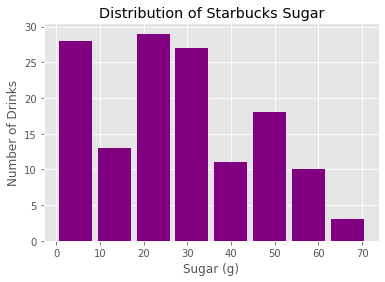

In [26]:
fig = plt.figure(figsize = (6, 4))
plt.hist(data.sugar, bins = 8, rwidth= 0.85, color='purple')
plt.title('Distribution of Starbucks Sugar')
plt.xlabel("Sugar (g)")
plt.ylabel("Number of Drinks")
plt.show()

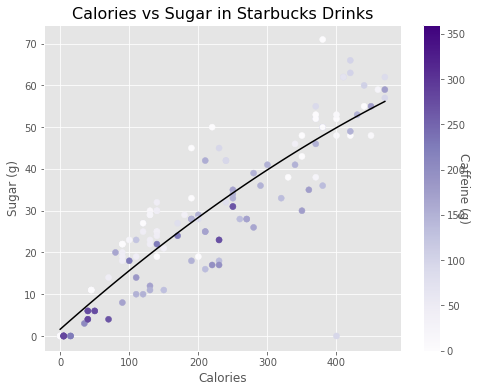

In [31]:
fig = plt.figure(figsize = (8, 6))
plt.scatter(data.calories, data.sugar, c=data.caffeine, cmap='Purples')
cbar = plt.colorbar()
cbar.set_label('Caffeine (g)', rotation=270)

# draw line
plt.plot(np.unique(data.calories), np.poly1d(np.polyfit(data.calories, data.sugar, 2))
         (np.unique(data.calories)), color = 'black')

plt.title('Calories vs Sugar in Starbucks Drinks', fontsize=16)
plt.xlabel("Calories")
plt.ylabel("Sugar (g)")
plt.show()

In [33]:
sugar_data= data.drop([,'fat','sodium','cholesterol','carb','protein','caffeine'],axis=1)
sugar_data.head()

,drink_name,type,size,calories,sugar
2,Caffè Americano,Hot Coffees,Grande,15.0,0.0
6,Blonde Roast,Hot Coffees,Grande,5.0,0.0
10,Caffè Misto,Hot Coffees,Grande,110.0,10.0
14,Featured Starbucks® Dark Roast Coffee,Hot Coffees,Grande,5.0,0.0
18,Pike Place® Roast,Hot Coffees,Grande,5.0,0.0


In [23]:
Sugar = sugar_data[sugar_data.sugar !=0]
Sugar.head()

,drink_name,type,size,calories,sugar
10,Caffè Misto,Hot Coffees,Grande,110.0,10.0
26,Cappuccino,Hot Coffees,Grande,120.0,10.0
38,Flat White,Hot Coffees,Grande,220.0,17.0
42,Almondmilk Honey Flat White with Starbucks® Bl...,Hot Coffees,Grande,170.0,24.0
46,Pumpkin Spice Latte,Hot Coffees,Grande,380.0,50.0


In [20]:
syrup_data = [['Flavored Syrup',20,5],['Mocha Syrup', 25,5]]
syrup=pd.DataFrame(syrup_data,columns=['Syrup','calories','sugar'])
syrup

,Syrup,calories,sugar
0,Flavored Syrup,20,5
1,Mocha Syrup,25,5


In [64]:
sug_avg = Sugar.groupby('type').mean()
sug_avg

,calories,sugar
type,,
Cold Coffees,181.285714,21.314286
Cold Drinks,129.411765,25.117647
Frappuccinos,385.000000,53.600000
Hot Coffees,273.500000,31.000000
Hot Drinks,350.000000,47.222222
Hot Teas,188.000000,30.800000
Iced Teas,114.642857,23.357143


In [67]:
reduced_sugar_avg= sug_avg.sub([20,5], axis='columns')
reduced_sugar_avg

,calories,sugar
type,,
Cold Coffees,161.285714,16.314286
Cold Drinks,109.411765,20.117647
Frappuccinos,365.000000,48.600000
Hot Coffees,253.500000,26.000000
Hot Drinks,330.000000,42.222222
Hot Teas,168.000000,25.800000
Iced Teas,94.642857,18.357143


In [90]:
reduced_sugar_avg['sugar_percent'] =(reduced_sugar_avg['sugar'] / sug_avg['sugar'])*100
reduced_sugar_avg['cal_percent'] = (reduced_sugar_avg['calories'] / sug_avg['calories']) *100
reduced_sugar_avg

,calories,sugar,sugar_percent,cal_percent
type,,,,
Cold Coffees,161.285714,16.314286,76.541555,88.967691
Cold Drinks,109.411765,20.117647,80.093677,84.545455
Frappuccinos,365.000000,48.600000,90.671642,94.805195
Hot Coffees,253.500000,26.000000,83.870968,92.687386
Hot Drinks,330.000000,42.222222,89.411765,94.285714
Hot Teas,168.000000,25.800000,83.766234,89.361702
Iced Teas,94.642857,18.357143,78.593272,82.554517


<Figure size 576x432 with 0 Axes>

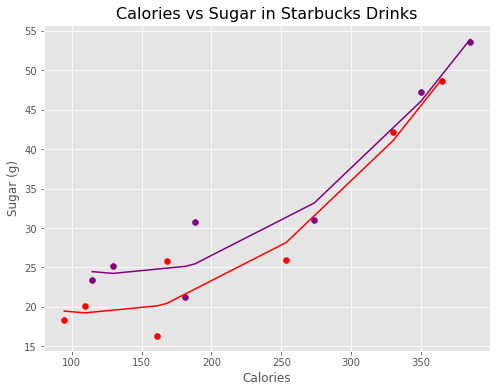

In [81]:
fig = plt.figure(figsize = (8, 6))
fig = plt.figure(figsize = (8, 6))
plt.scatter(sug_avg.calories, sug_avg.sugar, color='Purple')
plt.scatter(reduced_sugar_avg.calories, reduced_sugar_avg.sugar, color='Red')

# draw line
plt.plot(np.unique(sug_avg.calories), np.poly1d(np.polyfit(sug_avg.calories,sug_avg.sugar, 2))
         (np.unique(sug_avg.calories)), color = 'Purple')
plt.plot(np.unique(reduced_sugar_avg.calories), np.poly1d(np.polyfit(reduced_sugar_avg.calories,reduced_sugar_avg.sugar, 2))
         (np.unique(reduced_sugar_avg.calories)), color = 'Red')

plt.title('Calories vs Sugar in Starbucks Drinks', fontsize=16)
plt.xlabel("Calories")
plt.ylabel("Sugar (g)")
plt.show()

In [88]:
# this shows a slight reduction in calories and sugar if you remove one pump of syrup 

reduced_sugar_avg['sugar_percent'].mean()

16.72155543555371

In [91]:
100-reduced_sugar_avg['cal_percent'].mean()

10.398905752323927

By removing one pump of flavored syrup from a starbucks Grande beverage you can reduce sugar by 16% and calories by 10% on average. 